# The most relevant features in mystery.dat file

## Setup

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

## Read file

In [7]:
def read_file(file_name):
    with open(file_name) as f:
        for line in f:
            yield line

def count_lines(file):
    i = 0
    for line in file:
        i += 1
        if i == 100:
            print(line)
        
    print(i)

count_lines(read_file('mystery.dat'))

1.12062,0.68561,-1.08000,-1.28037,1.41422,-1.29098,0.50360,-0.33921,-0.34329,-0.68063,0.70529,0.88919,-0.23799,0.47064,-1.72509,1.17562,0.25571,-0.58619,-0.62335,-1.48772,0.31379,-1.16493,0.65195,-0.61874,-0.73839,0.69240,0.38133,0.79126,0.40425,1.63912,-0.06443,-0.10772,1.88496,0.40257,-0.62738,-0.98083,1.10342,0.55330,1.14501,1.25166,-0.81600,-0.89081,-0.27998,-1.71397,0.32343,-0.13941,-1.80236,-0.87472,0.79840,-1.12636,1.66920,-0.58274,0.27922,1.55559,0.67513,0.92215,-0.76133,0.27187,-0.09497,0.92868,1.70521,1.77015,-0.59017,0.37268,-1.08678,-0.93095,0.96332,-0.27113,0.19001,1.50813,-0.04694,0.65725,-0.93772,-0.10791,0.51713,-0.23010,-1.18427,-0.65481,0.29565,-2.42388,-1.03834,-2.15352,-0.26397,-0.20442,0.61023,0.43854,1.10784,0.44069,-0.26233,-1.24467,-1.04712,0.34372,1.36967,-1.31171,0.45896,1.70088,0.66926,-1.70956,1.19260,0.33696,3.53143

101


In [6]:
def make_x_y_arrays(file):
    x = []
    y = []
    
    for line in file:
        row = line.split(',')
        x.append(row[:-1])
        y.append(row[-1])
        
    x_arr = np.array(x)
    y_arr = np.array(y)
    
    return x_arr, y_arr


In [9]:
mystery_dat = read_file('mystery.dat')
X, y = make_x_y_arrays(mystery_dat)
print('X dimension: ', X.shape)
print('y dimension: ', y.shape)

X dimension:  (101, 100)
y dimension:  (101,)


## Fit linear model

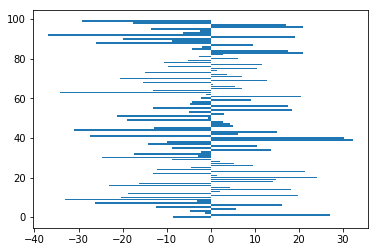

In [10]:
lm = linear_model.LinearRegression()
lm.fit(X, y)

fig, ax = plt.subplots()

y_pos = range(len(lm.coef_))
weights = lm.coef_
ax.barh(y_pos, weights, align='center')

plt.show()

In [45]:
def plot_weight_vs_regularization(lambdas):
    weights = []
    for lambda_ in lambdas:
        lasso = linear_model.Lasso(alpha=lambda_)
        lasso.fit(X, y)
        weights.append(lasso.coef_)
        
    weights_arr = np.array(weights)

    # get highest weights a quarter way after increasing regularization
    lambda_q1_ind = round(len(lambdas) / 4)
    top_ten_ind = np.argsort(weights_arr[lambda_q1_ind, :])[-10:]
    
    # plot results
    fig, ax = plt.subplots(figsize=(10, 10))
    
    for feature_ind in range(weights_arr.shape[1]):
        if feature_ind in top_ten_ind:
            ax.plot(lambdas, weights_arr[:, feature_ind], label=str(feature_ind + 1))
        else:
            ax.plot(lambdas, weights_arr[:, feature_ind])
     
    ax.set_xlabel('lambda')
    ax.set_ylabel('weight')
    ax.set_title('Weights With Increasing Regularization')
    
    plt.legend(loc='best', title='Top ten features')
    plt.show()

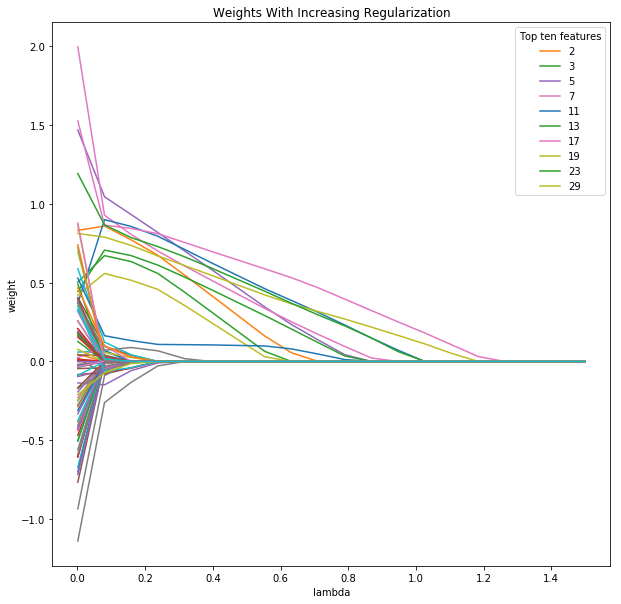

In [46]:
lambdas = np.linspace(0.001, 1.5, 20)
plot_weight_vs_regularization(lambdas)